In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Lasso, Ridge

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [4]:
pd.options.display.max_columns = None
# pd.options.display.expand_frame_repr = False

In [5]:
data = pd.read_csv('input/train.csv')

In [6]:
data.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,B,B,35,7715,4,990.0,0,6,B,215898.447742
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,B,B,20,4386,14,NaN,1,5,B,296021.204377
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
8,5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,229102.795999
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,B,B,6,1437,3,NaN,0,2,B,95380.220993


In [7]:
data.shape

(10000, 20)

In [8]:
data['Id'].nunique()

10000

In [9]:
data = data.drop('Healthcare_1', axis=1)

In [10]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,6.000000,23.000000,633233.466570


In [11]:
data.loc[data['HouseYear'] == 20052011, 'HouseYear'] = 2008
data.loc[data['HouseYear'] == 4968, 'HouseYear'] = 1968

In [12]:
data.loc[data['Id'].isin([5927, 14003, 14865]), 'Rooms'] = 2
data.loc[data['Id'] == 8491, 'Rooms'] = 1

In [13]:
mean_square = data.groupby('Rooms', as_index=False)[['Square']].mean().rename(columns={'Square': 'mean_square'})
data = pd.merge(data, mean_square, on='Rooms', how='left')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
mean_square      10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [15]:
small_square_ids = data.loc[data['Square'] < 15, 'Id'].values
data.loc[data['Id'].isin(small_square_ids), 'Square'] = data['mean_square']
data.loc[data['Id'].isin(small_square_ids), 'LifeSquare'] = data['Square']

In [16]:
large_square_ids = data.loc[data['Square'] > 150, 'Id'].values
data.loc[data['Id'].isin(large_square_ids), 'Square'] = data['mean_square']
data.loc[data['Id'].isin(large_square_ids), 'LifeSquare'] = data['Square']

In [17]:
data.loc[pd.isna(data['LifeSquare']), 'LifeSquare'] = data['Square'] - data['KitchenSquare']
data.loc[data['LifeSquare'] > data['Square'], 'LifeSquare'] = data['Square'] - data['KitchenSquare']
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       10000 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
mean_square      10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.7+ MB


In [18]:
data.loc[data['LifeSquare'] > data['Square']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,mean_square


In [19]:
data.loc[data['Square'] > 200]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,mean_square


In [20]:
data.loc[data['KitchenSquare'] > 200, 'KitchenSquare'] = 0

In [21]:
data.loc[data['LifeSquare'] > 200]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,mean_square


In [22]:
data.loc[data['KitchenSquare'] > 200]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,mean_square


In [23]:
# data.loc[data['KitchenSquare'] > data['LifeSquare'], ['KitchenSquare', 'LifeSquare']] =\
#     data[['LifeSquare', 'KitchenSquare']].values

data.loc[data['KitchenSquare'] > data['LifeSquare'], ['KitchenSquare', 'LifeSquare']] =\
    data.loc[data['KitchenSquare'] > data['LifeSquare'], ['LifeSquare', 'KitchenSquare']].values

In [24]:
data.loc[data['KitchenSquare'] > data['LifeSquare']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,mean_square


In [25]:
data.loc[data['LifeSquare'] > 200]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,mean_square


In [26]:
data.loc[data['KitchenSquare'] > 20, 'KitchenSquare'] = data['Square'] - data['LifeSquare']

In [27]:
# data.loc[data['KitchenSquare'] > data['LifeSquare'], ['KitchenSquare', 'LifeSquare']] =\
#     data[['LifeSquare', 'KitchenSquare']].values

data.loc[data['KitchenSquare'] > data['LifeSquare'], ['KitchenSquare', 'LifeSquare']] =\
    data.loc[data['KitchenSquare'] > data['LifeSquare'], ['LifeSquare', 'KitchenSquare']].values

In [28]:
data.loc[data['KitchenSquare'] > data['LifeSquare']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,mean_square


In [29]:
data.loc[data['KitchenSquare'] > 50]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,mean_square
8182,16511,52,3.0,135.731888,71.583248,64.148640,26,25.0,2008,0.371149,B,B,34,7065,1,2,5,B,495110.650183,76.903234
8921,12074,94,3.0,108.957285,57.893565,51.063721,2,22.0,2008,0.282798,B,B,33,8667,2,0,6,B,562559.600217,76.903234


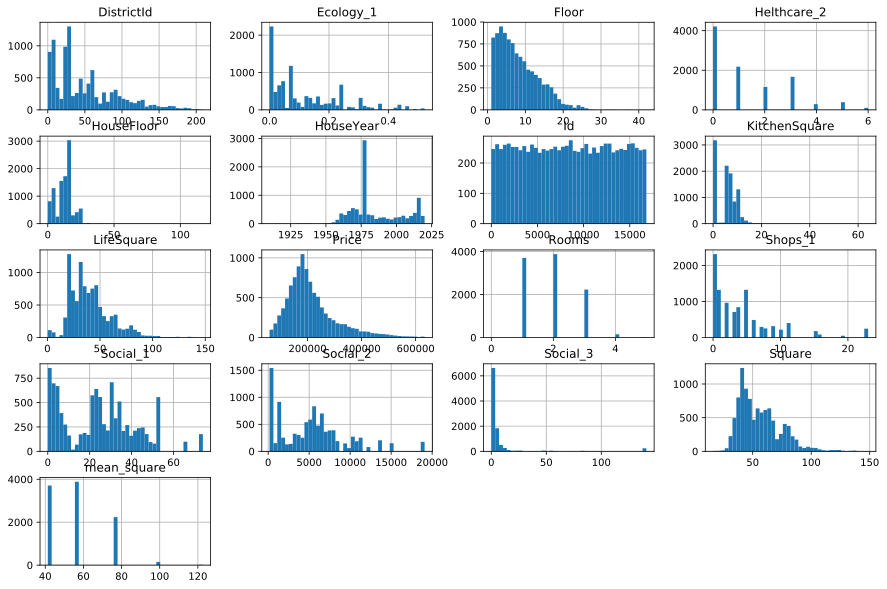

In [30]:
data.hist(bins=40, figsize=(15,10), zorder=2)
plt.show()

In [31]:
y = pd.DataFrame(data, columns=['Price'])
y.head()

,Price
0,184966.930730
1,300009.450063
2,220925.908524
3,175616.227217
4,150226.531644


In [32]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 1 columns):
Price    10000 non-null float64
dtypes: float64(1)
memory usage: 412.2 KB


In [33]:
y.describe()

,Price
count,10000.000000
mean,214138.857399
std,92872.293865
min,59174.778028
25%,153872.633942
50%,192269.644879
75%,249135.462171
max,633233.466570


In [34]:
def print_unique():
    for feat in data.columns:
        nunique = data[feat].nunique()
        print(f'{feat:15} {nunique:5}', end='')
        unique = '[...]'
        if nunique <= 25:
            unique = data[feat].unique()
            unique.sort()
        print('    ', end='')
        print(unique)

In [35]:
print_unique()

Id              10000    [...]
DistrictId        205    [...]
Rooms               6    [0. 1. 2. 3. 4. 5.]
Square           9967    [...]
LifeSquare       9965    [...]
KitchenSquare      68    [...]
Floor              33    [...]
HouseFloor         44    [...]
HouseYear          95    [...]
Ecology_1         129    [...]
Ecology_2           2    ['A' 'B']
Ecology_3           2    ['A' 'B']
Social_1           51    [...]
Social_2          142    [...]
Social_3           30    [...]
Helthcare_2         7    [0 1 2 3 4 5 6]
Shops_1            16    [ 0  1  2  3  4  5  6  7  8  9 10 11 15 16 19 23]
Shops_2             2    ['A' 'B']
Price           10000    [...]
mean_square         6    [ 41.32346172  56.79052572  76.90323406  81.62035809  98.37754356
 122.61494139]


In [36]:
def _ab_to_01(feat):
    try:
        data[feat] = data[feat].replace(['A', 'B'], [0, 1])
    except:
        pass
    
_ab_to_01('Ecology_2')
_ab_to_01('Ecology_3')
_ab_to_01('Shops_2')

In [37]:
print_unique()

Id              10000    [...]
DistrictId        205    [...]
Rooms               6    [0. 1. 2. 3. 4. 5.]
Square           9967    [...]
LifeSquare       9965    [...]
KitchenSquare      68    [...]
Floor              33    [...]
HouseFloor         44    [...]
HouseYear          95    [...]
Ecology_1         129    [...]
Ecology_2           2    [0 1]
Ecology_3           2    [0 1]
Social_1           51    [...]
Social_2          142    [...]
Social_3           30    [...]
Helthcare_2         7    [0 1 2 3 4 5 6]
Shops_1            16    [ 0  1  2  3  4  5  6  7  8  9 10 11 15 16 19 23]
Shops_2             2    [0 1]
Price           10000    [...]
mean_square         6    [ 41.32346172  56.79052572  76.90323406  81.62035809  98.37754356
 122.61494139]


In [38]:
data.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,mean_square
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,1,1,33,7976,5,0,11,1,184966.930730,56.790526
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,1,1,46,10309,1,1,16,1,300009.450063,76.903234
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,1,1,34,7759,0,1,3,1,220925.908524,56.790526
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,1,1,23,5735,3,0,5,1,175616.227217,56.790526
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,1,1,35,5776,1,2,4,1,150226.531644,41.323462
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,1,1,35,7715,4,0,6,1,215898.447742,76.903234
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,1,1,20,4386,14,1,5,1,296021.204377,56.790526
7,11993,74,2.0,80.312926,80.312926,0.0,14,0.0,1977,0.075779,1,1,6,1437,3,0,2,1,221244.156664,56.790526
8,5172,1,2.0,64.511437,63.511437,1.0,9,17.0,1977,0.007122,1,1,1,264,0,0,1,1,229102.795999,56.790526
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,1,1,6,1437,3,0,2,1,95380.220993,41.323462


In [39]:
feats = [
#     'DistrictId',
    'Rooms',
    'Square',
    'LifeSquare',
    'KitchenSquare',
    'Floor',
    'HouseFloor',
    'HouseYear',
    'Ecology_1',
    'Ecology_2',
    'Ecology_3',
    'Social_1',
    'Social_2',
    'Social_3',
#     'Healthcare_1',
    'Helthcare_2',
    'Shops_1',
    'Shops_2',
    ]

X = pd.DataFrame(data, columns=feats)

def _ctgr(feat):
    try:
        X[feat] = X[feat].astype('category')
    except:
        pass

# _ctgr('DistrictId')
_ctgr('Rooms')
# _ctgr('Floor')
# _ctgr('FloorRev')
# _ctgr('HouseFloor')
# _ctgr('HouseYear')
# _ctgr('Ecology_2')
# _ctgr('Ecology_3')
# _ctgr('Healthcare_2')
# _ctgr('Shops_1')
# _ctgr('Shops_2')

X = pd.get_dummies(X)
X.head()

,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Rooms_0.0,Rooms_1.0,Rooms_2.0,Rooms_3.0,Rooms_4.0,Rooms_5.0
0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,1,1,33,7976,5,0,11,1,0,0,1,0,0,0
1,65.683640,40.049543,8.0,7,9.0,1978,0.000070,1,1,46,10309,1,1,16,1,0,0,0,1,0,0
2,44.947953,29.197612,0.0,8,12.0,1968,0.049637,1,1,34,7759,0,1,3,1,0,0,1,0,0,0
3,53.352981,52.731512,9.0,8,17.0,1977,0.437885,1,1,23,5735,3,0,5,1,0,0,1,0,0,0
4,39.649192,23.776169,7.0,11,12.0,1976,0.012339,1,1,35,5776,1,2,4,1,0,1,0,0,0,0


In [40]:
# print(X['Rooms_0.0'].unique())
# print(X['Rooms_1.0'].unique())
# print(X['Rooms_2.0'].unique())
# print(X['Rooms_3.0'].unique())
# print(X['Rooms_4.0'].unique())
# print(X['Rooms_5.0'].unique())

In [41]:
try:
    X = X.drop('Rooms_0.0', axis=1)
    X = X.drop('Rooms_1.0', axis=1)
    X = X.drop('Rooms_2.0', axis=1)
    X = X.drop('Rooms_3.0', axis=1)
    X = X.drop('Rooms_4.0', axis=1)
    X = X.drop('Rooms_5.0', axis=1)
except:
    pass

In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 15 columns):
Square           10000 non-null float64
LifeSquare       10000 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null int64
Ecology_3        10000 non-null int64
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null int64
dtypes: float64(5), int64(10)
memory usage: 1.5 MB


In [43]:
X.describe()

,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,56.006869,40.569441,5.697080,8.526700,12.609400,1984.86600,0.118858,0.990300,0.972500,24.687000,5352.157400,8.039200,1.319500,4.231300,0.917500
std,18.179331,19.584456,4.074395,5.241148,6.775974,18.41187,0.119025,0.098015,0.163543,17.532614,4006.799803,23.831875,1.493601,4.806341,0.275139
min,16.117154,0.370619,0.000000,1.000000,0.000000,1910.00000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000
25%,41.774881,25.634333,1.000000,4.000000,9.000000,1974.00000,0.017647,1.000000,1.000000,6.000000,1564.000000,0.000000,0.000000,1.000000,1.000000
50%,52.513310,36.880207,6.000000,7.000000,13.000000,1977.00000,0.075424,1.000000,1.000000,25.000000,5285.000000,2.000000,1.000000,3.000000,1.000000
75%,65.889256,49.640594,9.000000,12.000000,17.000000,2001.00000,0.195781,1.000000,1.000000,36.000000,7227.000000,5.000000,2.000000,6.000000,1.000000
max,148.671938,147.709302,64.148640,42.000000,117.000000,2020.00000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,6.000000,23.000000,1.000000


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [45]:
lr = LinearRegression()
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)
X_test_scaled

lr.fit(X_train_scaled, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

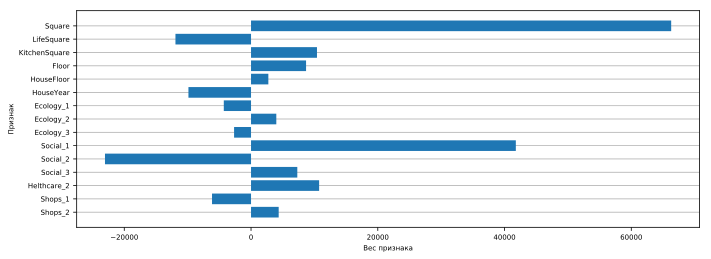

In [46]:
plt.rcParams.update({'font.size': 7})
plt.rcParams["axes.grid.axis"] = "y"
plt.rcParams["axes.grid"] = True

plt.barh(X_train.columns, lr.coef_.flatten(), zorder=2)
plt.xlabel('Вес признака')
plt.ylabel('Признак')

fig = plt.gcf()
fig.set_size_inches(11.2, 4)
plt.gca().invert_yaxis()

In [50]:
def create_model(X_train, y_train, X_test, y_test, feats, model):
    model.fit(X_train.loc[:, feats], y_train)
    y_pred = model.predict(X_test.loc[:, feats])
    ret = mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)
    return ret

In [52]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 15 columns):
Square           7500 non-null float64
LifeSquare       7500 non-null float64
KitchenSquare    7500 non-null float64
Floor            7500 non-null float64
HouseFloor       7500 non-null float64
HouseYear        7500 non-null float64
Ecology_1        7500 non-null float64
Ecology_2        7500 non-null float64
Ecology_3        7500 non-null float64
Social_1         7500 non-null float64
Social_2         7500 non-null float64
Social_3         7500 non-null float64
Helthcare_2      7500 non-null float64
Shops_1          7500 non-null float64
Shops_2          7500 non-null float64
dtypes: float64(15)
memory usage: 878.9 KB


In [54]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7500 entries, 4901 to 7270
Data columns (total 1 columns):
Price    7500 non-null float64
dtypes: float64(1)
memory usage: 117.2 KB


In [56]:
X_test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
Square           2500 non-null float64
LifeSquare       2500 non-null float64
KitchenSquare    2500 non-null float64
Floor            2500 non-null float64
HouseFloor       2500 non-null float64
HouseYear        2500 non-null float64
Ecology_1        2500 non-null float64
Ecology_2        2500 non-null float64
Ecology_3        2500 non-null float64
Social_1         2500 non-null float64
Social_2         2500 non-null float64
Social_3         2500 non-null float64
Helthcare_2      2500 non-null float64
Shops_1          2500 non-null float64
Shops_2          2500 non-null float64
dtypes: float64(15)
memory usage: 293.0 KB


In [57]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 6252 to 73
Data columns (total 1 columns):
Price    2500 non-null float64
dtypes: float64(1)
memory usage: 39.1 KB


In [48]:
create_model(X_train_scaled, y_train, X_test_scaled, y_test, feats, LinearRegression())

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
plt.clf()

n = 21
coeffs = np.zeros((n, len(X.columns)))
alpha_lists = np.logspace(1, 4, n)
for i, val in enumerate(alpha_lists):
   # print(X_train_scaled.head())
    model = Ridge(alpha=val)
    model.fit(X_train_scaled, y_train)
#     print(coeffs)
#     print(lasso.coef_)
#     print(coeffs.shape)
#     print(lasso.coef_.shape)
#     print(lasso.coef_.flatten().shape)
    coeffs[i, :] = model.coef_.flatten()

for i in range(len(X.columns)):
    #print(alpha_lists)
    #print(coeffs[i, :])
    plt.plot(alpha_lists, coeffs[:, i])

plt.xlabel('alpha')
plt.ylabel('вес признака')
plt.legend(X.columns, loc='upper center', ncol=9)

fig = plt.gcf()
fig.set_size_inches(10, 10)

In [ ]:
model = Ridge(alpha=1)
create_model(X_train_scaled, y_train, X_test_scaled, y_test, feats, model)

In [ ]:
# X.loc[X.Floor > X.HouseFloor]
# pd.concat(X.loc[X.HouseFloor > 40], y)